In [33]:
!pip install easyocr

In [34]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [35]:
IMAGE_PATH = '/content/surf.jpeg'
IMAGE_PATH1='/content/sign.png'

In [36]:
reader = easyocr.Reader(['en'])
result = reader.readtext(IMAGE_PATH)
result

[([[18, 18], [293, 18], [293, 145], [18, 145]], 'SURF', 0.9862082600593567)]

In [37]:
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX

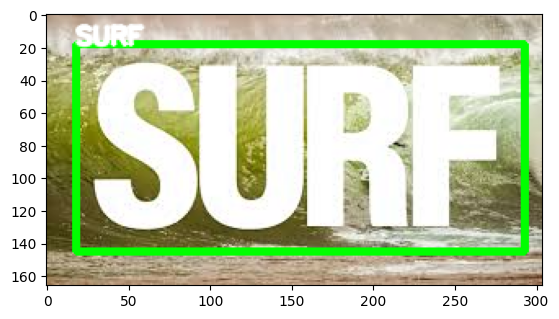

In [38]:
img = cv2.imread(IMAGE_PATH)
img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
img = cv2.putText(img,text,top_left, font, 0.5,(255,255,255),2,cv2.LINE_AA)
plt.imshow(img)
plt.show()

now i will optimise my code so that ican detect multiple text inside my image


These short of rogram is applicable for only images with single text

In [39]:
reader = easyocr.Reader(['en'])
result = reader.readtext(IMAGE_PATH1)
result

[([[19, 181], [165, 181], [165, 201], [19, 201]],
  'HEAD PROTECTION',
  0.9778256601171587),
 ([[31, 201], [153, 201], [153, 219], [31, 219]],
  'MUST BE WORN',
  0.9683688296531474),
 ([[39, 219], [145, 219], [145, 237], [39, 237]],
  'ON THIS SITE',
  0.9683973806374694)]

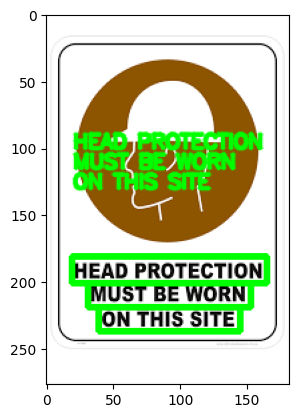

In [40]:
img = cv2.imread(IMAGE_PATH1)
spacer = 100
for detection in result:
    top_left = tuple(detection[0][0])
    bottom_right = tuple(detection[0][2])
    text = detection[1]
    img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
    img = cv2.putText(img,text,(20,spacer), font, 0.5,(0,255,0),2,cv2.LINE_AA)
    spacer+=15

plt.imshow(img)
plt.show()

Lets check the cpu and Memory uses for this progeram

In [41]:
import torch
import psutil

# Check if GPU is available
if torch.cuda.is_available():
    print(f"Using GPU: {torch.cuda.get_device_name(0)}")
    print(f"Memory Allocated: {torch.cuda.memory_allocated(0)/1024**3:.2f} GB")
    print(f"Memory Cached: {torch.cuda.memory_reserved(0)/1024**3:.2f} GB")
else:
    print("GPU not available, using CPU.")

# CPU usage
cpu_usage = psutil.cpu_percent(interval=1)
print(f"CPU Usage: {cpu_usage}%")

# Memory usage
memory_info = psutil.virtual_memory()
print(f"Memory Usage: {memory_info.percent}%")


GPU not available, using CPU.
CPU Usage: 14.4%
Memory Usage: 13.1%
